<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/StratifiedCvhyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv")
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
print(data.isnull().sum())
data.describe()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
data.columns=data.columns.str.strip()

In [7]:
data.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
data.columns=['IP_Mean',"IP_Sd","IP_kurtosis","IP_Skewness","IP_DM-SNR_Mean","IP_DM-SNR_Sd","IP_DM-SNR_kurtosis","IP_DM-SNR_Skewness","target"]

In [9]:
data.columns

Index(['IP_Mean', 'IP_Sd', 'IP_kurtosis', 'IP_Skewness', 'IP_DM-SNR_Mean',
       'IP_DM-SNR_Sd', 'IP_DM-SNR_kurtosis', 'IP_DM-SNR_Skewness', 'target'],
      dtype='object')

In [10]:
data.head()

,IP_Mean,IP_Sd,IP_kurtosis,IP_Skewness,IP_DM-SNR_Mean,IP_DM-SNR_Sd,IP_DM-SNR_kurtosis,IP_DM-SNR_Skewness,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [11]:
round(data.describe(),2)

,IP_Mean,IP_Sd,IP_kurtosis,IP_Skewness,IP_DM-SNR_Mean,IP_DM-SNR_Sd,IP_DM-SNR_kurtosis,IP_DM-SNR_Skewness,target
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

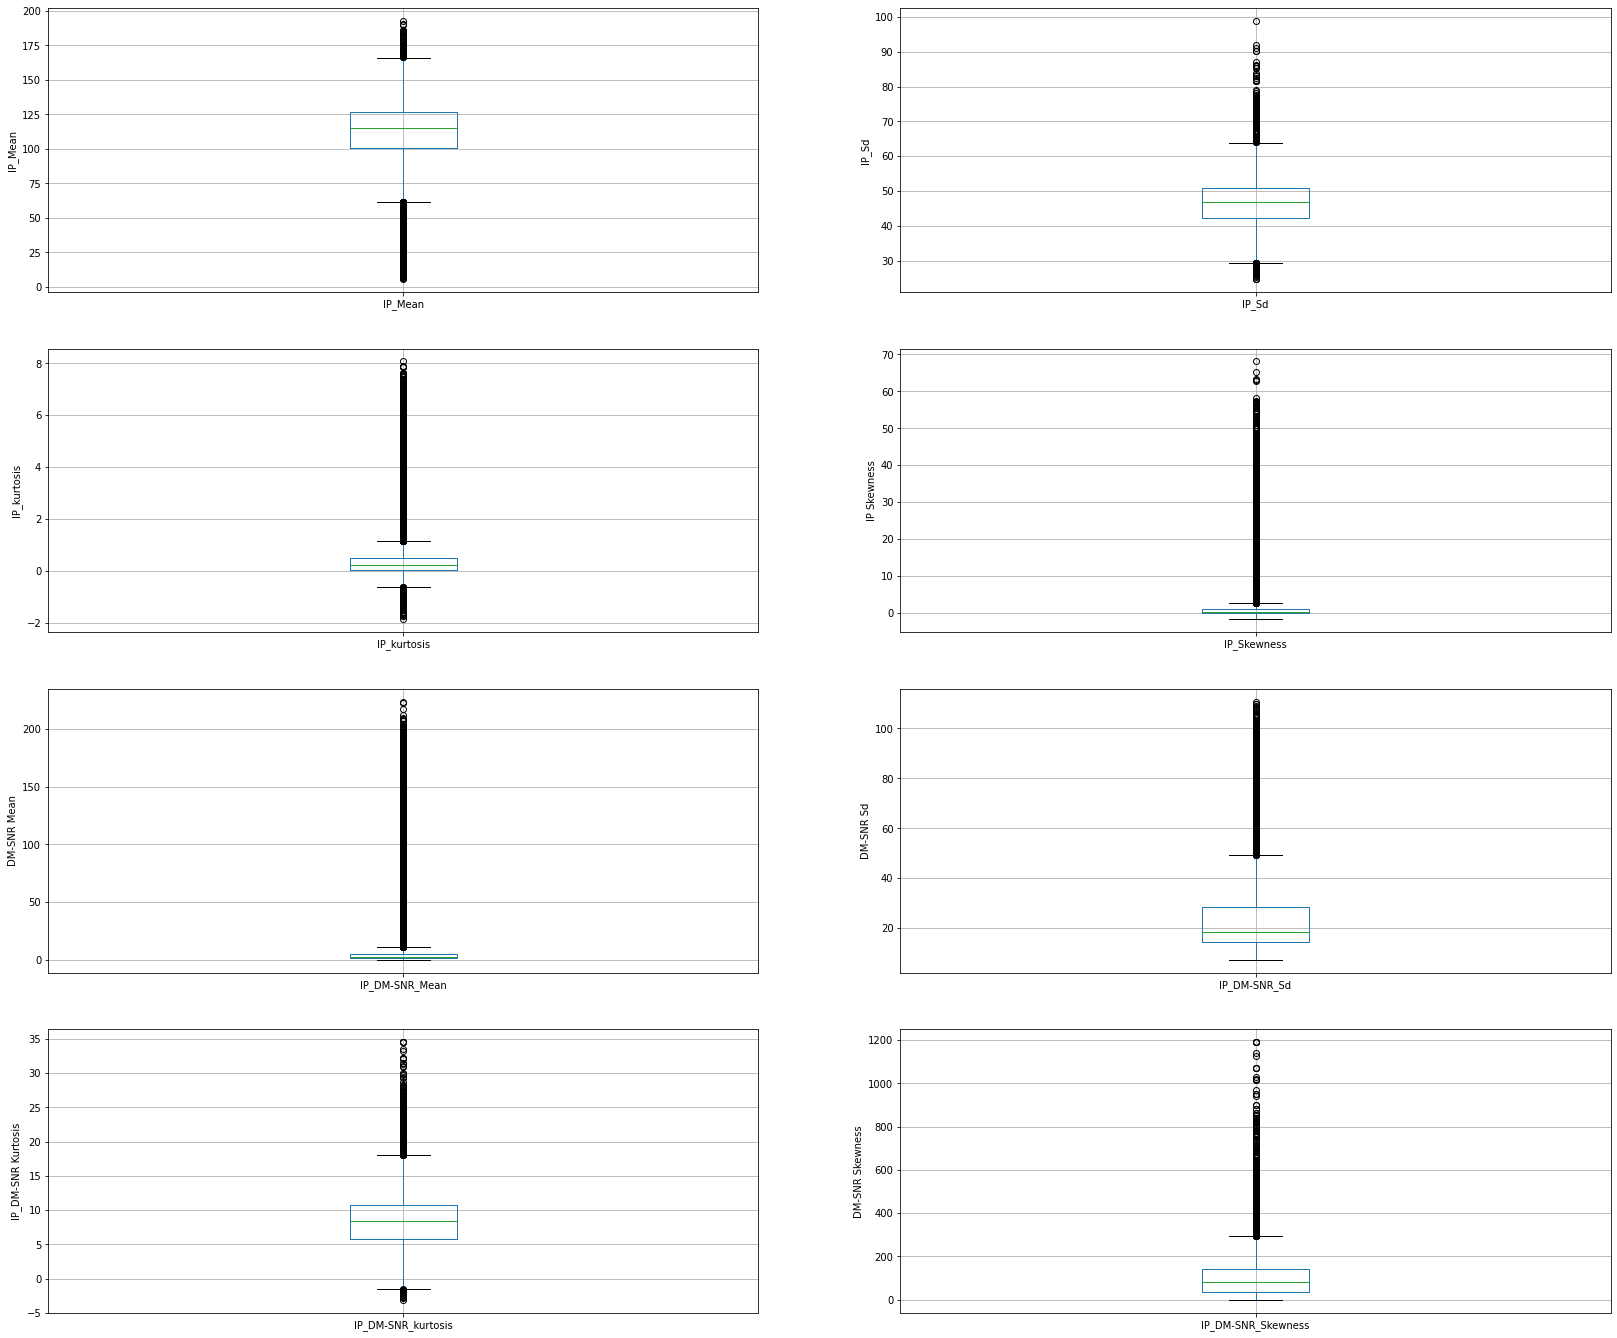

In [12]:
plt.figure(figsize=(28,24))

plt.subplot(4,2,1)
fig=data.boxplot(column="IP_Mean",)
fig.set_title("")
fig.set_ylabel("IP_Mean")

plt.subplot(4,2,2)
fig=data.boxplot(column="IP_Sd")
fig.set_title("")
fig.set_ylabel("IP_Sd")

plt.subplot(4,2,3)
fig=data.boxplot(column="IP_kurtosis")
fig.set_title("")
fig.set_ylabel("IP_kurtosis")

plt.subplot(4, 2, 4)
fig = data.boxplot(column='IP_Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = data.boxplot(column='IP_DM-SNR_Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='IP_DM-SNR_Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='IP_DM-SNR_kurtosis')
fig.set_title('')
fig.set_ylabel('IP_DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = data.boxplot(column='IP_DM-SNR_Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

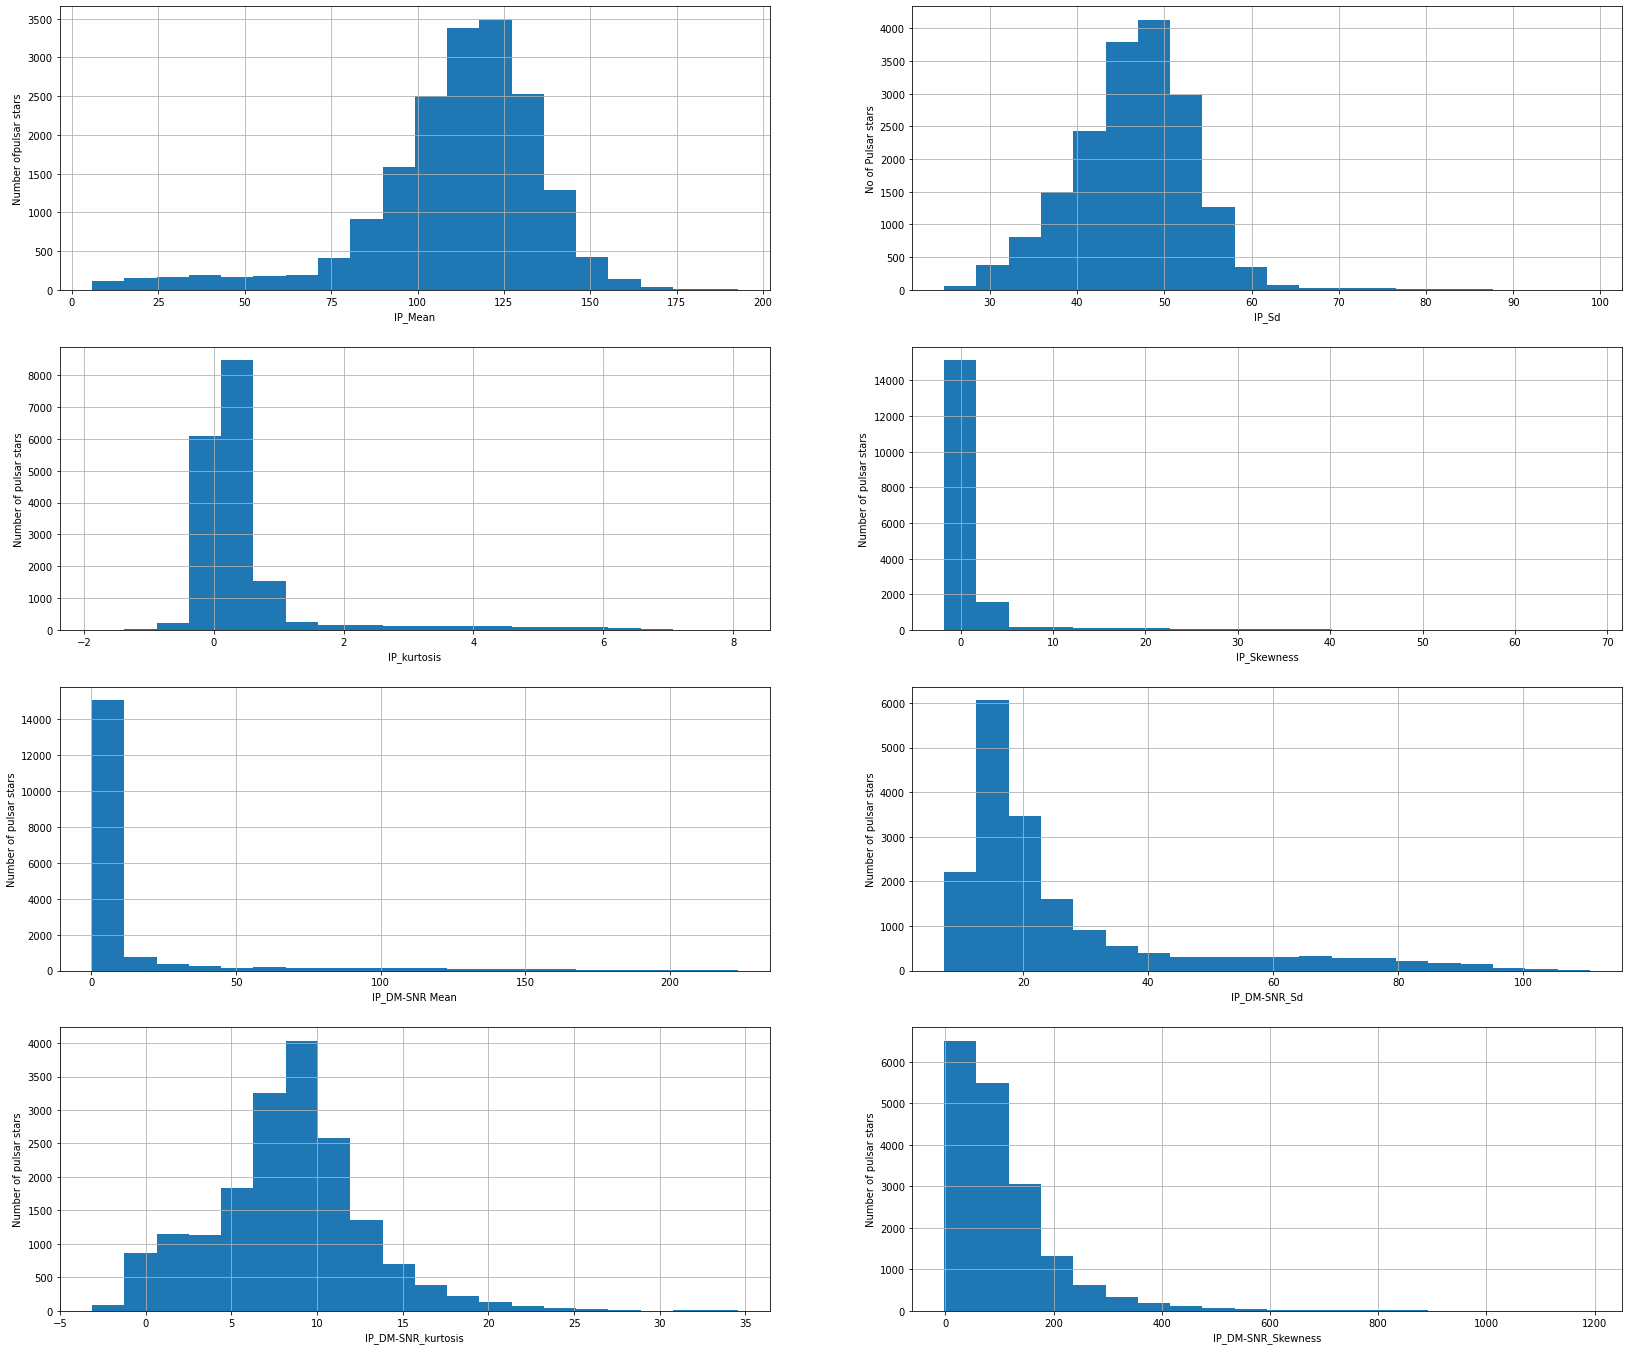

In [13]:
plt.figure(figsize=(28,24))

plt.subplot(4,2,1)
fig=data['IP_Mean'].hist(bins=20)
fig.set_ylabel("Number ofpulsar stars")
fig.set_xlabel("IP_Mean")

plt.subplot(4,2,2)
fig=data['IP_Sd'].hist(bins=20)
fig.set_xlabel("IP_Sd")
fig.set_ylabel("No of Pulsar stars")

plt.subplot(4, 2, 3)
fig = data['IP_kurtosis'].hist(bins=20)
fig.set_xlabel('IP_kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = data['IP_Skewness'].hist(bins=20)
fig.set_xlabel('IP_Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = data['IP_DM-SNR_Mean'].hist(bins=20)
fig.set_xlabel('IP_DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4,2,6)
fig=data['IP_DM-SNR_Sd'].hist(bins=20)
fig.set_xlabel("IP_DM-SNR_Sd")
fig.set_ylabel("Number of pulsar stars")

plt.subplot(4,2,7)
fig=data['IP_DM-SNR_kurtosis'].hist(bins=20)
fig.set_xlabel("IP_DM-SNR_kurtosis")
fig.set_ylabel("Number of pulsar stars")

plt.subplot(4,2,8)
fig=data['IP_DM-SNR_Skewness'].hist(bins=20)
fig.set_xlabel("IP_DM-SNR_Skewness")
fig.set_ylabel("Number of pulsar stars")


In [14]:
X = data.drop(['target'], axis=1)

y = data['target']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
data.columns[0:8]

Index(['IP_Mean', 'IP_Sd', 'IP_kurtosis', 'IP_Skewness', 'IP_DM-SNR_Mean',
       'IP_DM-SNR_Sd', 'IP_DM-SNR_kurtosis', 'IP_DM-SNR_Skewness'],
      dtype='object')

In [19]:
X_train=pd.DataFrame(X_train,columns=data.columns[0:len(data.columns)-1])
X_test=pd.DataFrame(X_test,columns=data.columns[0:len(data.columns)-1])

In [20]:
X_train.shape,X_test.shape

((14318, 8), (3580, 8))

In [21]:
X_train.describe()

,IP_Mean,IP_Sd,IP_kurtosis,IP_Skewness,IP_DM-SNR_Mean,IP_DM-SNR_Sd,IP_DM-SNR_kurtosis,IP_DM-SNR_Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.757488e-16,2.125527e-17,3.581784e-17,-2.205248e-17,-1.583840e-16,-9.700300e-18,1.214786e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


In [22]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


In [23]:
# instantiate classifier  and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In [24]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [25]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


In [26]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


False Positives (Actual Negative:0 but Predict Positive:1) - 17 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 44 (Type II error)

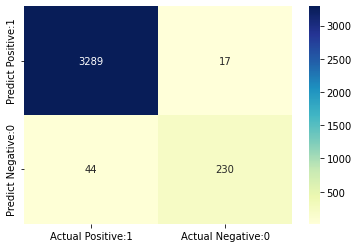

In [28]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



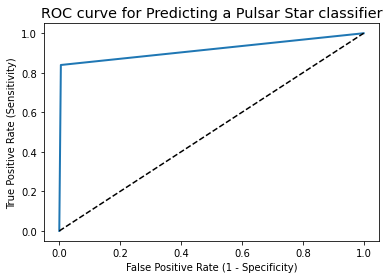

In [30]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [32]:
linear_scores

array([0.98296089, 0.97458101, 0.97988827, 0.97876502, 0.97848561])

In [33]:
from sklearn.model_selection import StratifiedKFold

stratkfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

rbf_Svc=SVC(kernel='rbf')
rbf_scores=cross_val_score(rbf_Svc,X,y,cv=stratkfold)
rbf_scores

array([0.9698324 , 0.97346369, 0.97290503, 0.97289746, 0.9742945 ])

In [35]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# import SVC classifier
from sklearn.svm import SVC
svc=SVC()

param_grid={'C':[2,3,5,10],
            'kernel':['linear','rbf'],
            'degree':[2,3,4],
            'gamma':[0.2,0.3,0.4]
            }
grid_search=GridSearchCV(svc,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [2, 3, 5, 10], 'degree': [2, 3, 4],
                         'gamma': [0.2, 0.3, 0.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [36]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'degree': 2, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, degree=2, gamma=0.3)


In [39]:
print('GridSearch CV score on test set: {0:.2f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.98
